<img src="https://raw.githubusercontent.com/Mauritas99/Proyect_images/refs/heads/main/ETL_EDA.jpg">

<li style="font-size:1.3rem; top:2px;"><em>Exploración y Limpieza de Datos (EDA & ETL)</em></li>
    <ul>
        <li style="font-size:1.2rem; margin-top:10px;">[x] Cargar el dataset a través de la API de Kaggle y realizar un análisis exploratorio del mismo.
        </li>
        <li style="font-size:1.2rem; margin-top:10px;">[x] Identificar valores nulos, duplicados y posibles inconsistencias.
        </li>
        <li style="font-size:1.2rem; margin-top:10px;">[x] Manejo de valores faltantes (fundamentación).
        </li>
        <li style="font-size:1.2rem; margin-top:10px;">[x] Visualización de distribuciones.
        </li>
        <li style="font-size:1.2rem; margin-top:10px;">[x] Creación de nuevas variables si es necesario (ej.segmentación de precios en rangos).
        </li>
    </ul>
    <br>

><h2>1.Importar librerias</h2>

In [ ]:
# pip install kaggle

In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning) # Ignorar advertencias.

><h2>2.Extracción.</h2>

In [ ]:
!kaggle datasets download -d zynicide/wine-reviews
#Descargamos el dataset desde el notebook.
with zipfile.ZipFile("wine-reviews.zip","r") as zip_wines:
    zip_wines.extractall("../1_Data")
os.remove("wine-reviews.zip") # Eliminamos el archivo .zip
os.remove("../1_Data/winemag-data_first150k.csv") # Eliminamos el archivo .zip
os.remove("../1_Data/winemag-data-130k-v2.json") # Eliminamos el archivo .zip

In [11]:
df_wines = pd.read_csv("../1_Data/winemag-data-130k-v2.csv") # Cargar el dataset

<h4><em>2.1. Inspeccionar el dataset.</em></h4>

In [12]:
nulos = df_wines.isna().sum().sum()
duplicados = df_wines.duplicated().sum()

print(f"Cantidad de datos del dataset: {df_wines.size}")
print(f"El dataset contiene {df_wines.shape[0]} filas y {df_wines.shape[1]} columnas.")
print(f"Cantidad de datos nulos: {nulos}")
print(f"Cantidad de datos duplicados: {duplicados}")

Cantidad de datos del dataset: 1819594
El dataset contiene 129971 filas y 14 columnas.
Cantidad de datos nulos: 204752
Cantidad de datos duplicados: 0


<h4><em>2.2. Inspeccionar nulos.</em></h4>

In [13]:
df_wines.isna().sum().sort_values(ascending=False)

region_2                 79460
designation              37465
taster_twitter_handle    31213
taster_name              26244
region_1                 21247
price                     8996
country                     63
province                    63
variety                      1
Unnamed: 0                   0
description                  0
points                       0
title                        0
winery                       0
dtype: int64

In [14]:
df_wines.info() # Resumen del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


<h4><em>Resumen de la inspección de datos</em></h4>

<ul>
    <li style="font-size:1.4rem; top:2px;">El Dataframe posee <b>129.971  </b> filas y <b>14 </b> columnas, con un total de <b>1.819.594</b> datos (objetos, flotantes y enteros).</li>
    <li style="font-size:1.4rem; top:2px;">El Dataframe posee <small style="color:red;font-size:1.4rem;""><b>204752 </b></small>valores nulos.</li>
    <li style="font-size:1.4rem; top:2px;">La <b>mayoria</b> de valores nulos corresponden a <b>variables categóricas</b>.</li>
    <li style="font-size:1.4rem; top:2px;">El Dataframe posee <b>0 </b>valores duplicados.</li>
</ul>

<h4><em>2.2. Visualizaciones pre-transformación.</em></h4>

<h4 style="font-size:1.7rem;"><em>2.2.1 Variables numéricas.</em></h4>

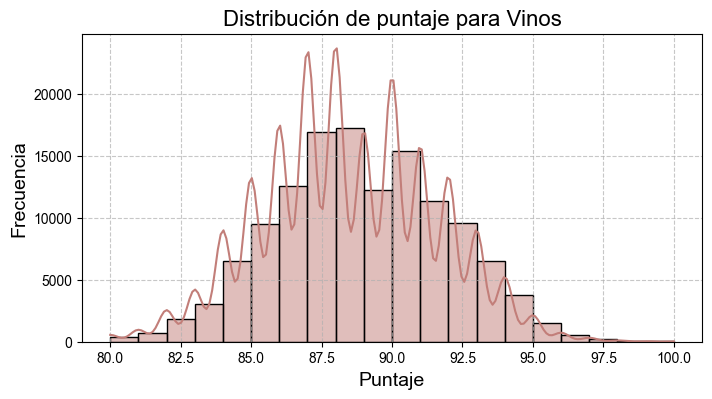

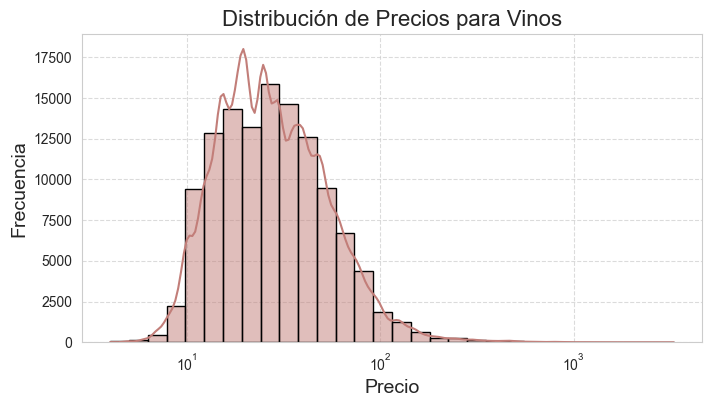

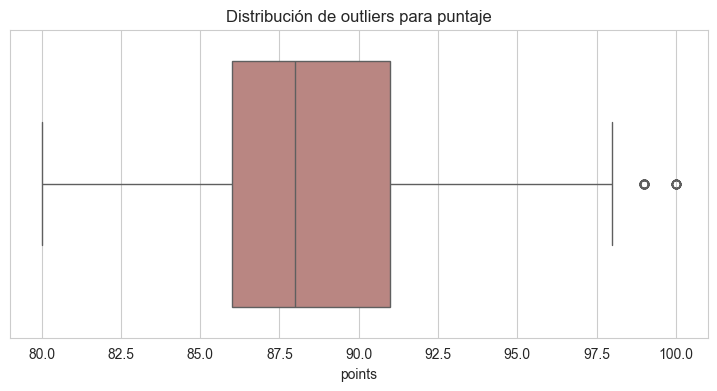

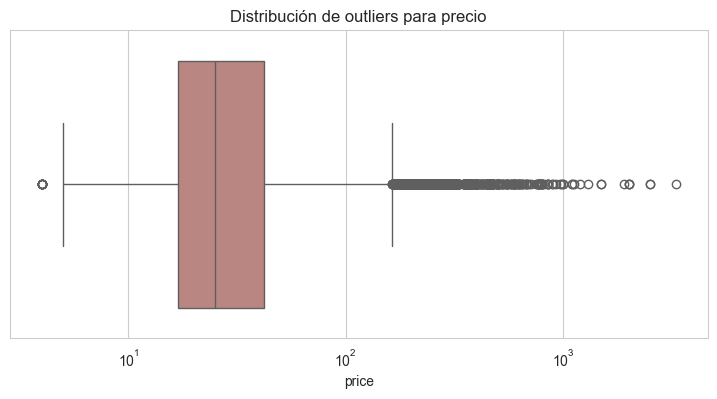

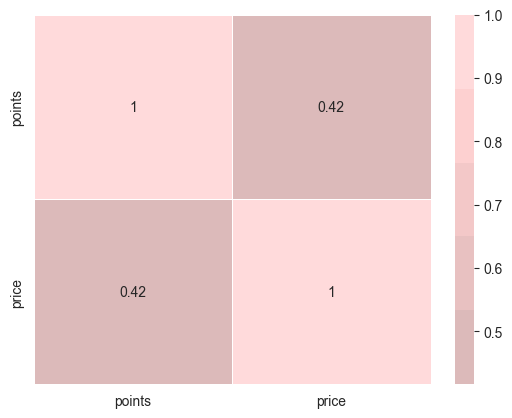

In [15]:
col_num_wines = df_wines.select_dtypes(include="number")
col_num_wines = col_num_wines.drop(columns="Unnamed: 0",axis=1) # Eliminamos columna fuera de interés.

# Histogramas:
configs_hist = [
    {"data": col_num_wines["points"], "log_scale": False, "title": "Distribución de puntaje para Vinos", "bins": 20, "xlabel": "Puntaje"},
    {"data": col_num_wines["price"], "log_scale": True, "title": "Distribución de Precios para Vinos", "bins": 30, "xlabel": "Precio"}
]
configs_box = [
    {"data": col_num_wines["points"], "log_scale": False, "title": "Distribución de outliers para puntaje", "xlabel": "Puntaje"},
    {"data": col_num_wines["price"], "log_scale": True, "title": "Distribución de outliers para precio", "xlabel": "Precio"}
]

# Crear los gráficos
for config in configs_hist:
    plt.figure(figsize=(8, 4))
    sns.histplot(config["data"], kde=True, log_scale=config["log_scale"], color='xkcd:brownish pink', edgecolor='black', bins=config["bins"])
    plt.title(config["title"], fontsize=16)
    plt.xlabel(config["xlabel"], fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    sns.set_style("whitegrid")
    plt.show()

# Boxplots:

for config in configs_box:
    plt.figure(figsize=(9,4))
    sns.boxplot(x=config["data"],log_scale=config["log_scale"],color='xkcd:brownish pink')
    plt.title(config["title"])
    plt.show()

# Matriz de correlación.

matriz = col_num_wines.corr()
colors = ["#dcbaba", "#e8c1c1", "#f3c8c8", "#fdd0d0", "#ffdadb"]
cmap = sns.color_palette(colors, as_cmap=True)
sns.heatmap(matriz, annot=True,cmap=cmap,linewidths=0.5)
plt.show()


<h4 style="font-size:1.7rem;"><em>2.2.2 Variables categóricas.</em></h4>

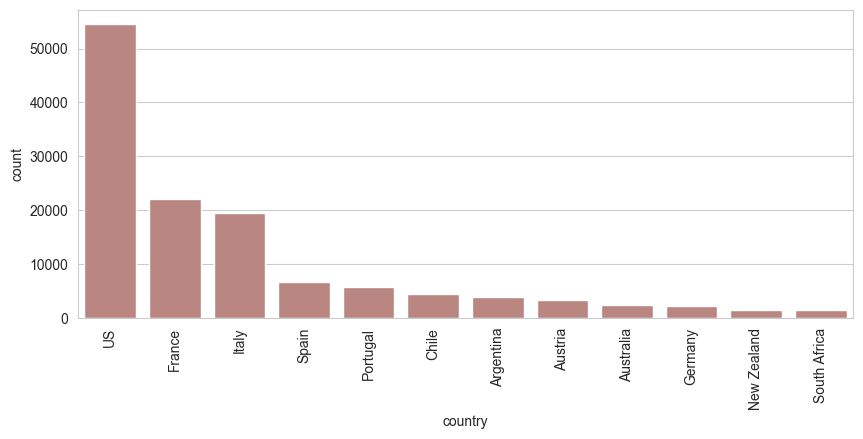

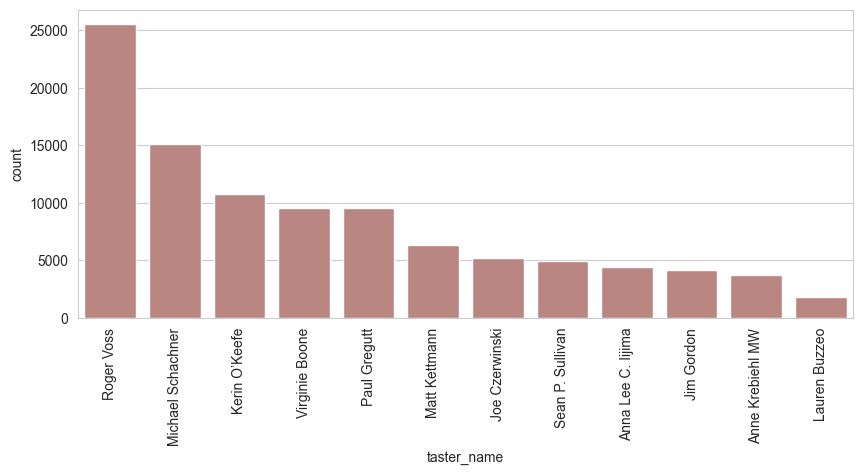

In [16]:
col_cat_wines = df_wines.loc[:,["country","taster_name"]] # Debido a la cantidad excesiva de coincidencias por columna, solo se calcula la frencuencia de limitadas columnas.

#Gráficos de barras

for column in col_cat_wines:
    plt.figure(figsize=(10,4))
    sns.barplot(x=col_cat_wines[column].value_counts().head(12).keys(),y=col_cat_wines[column].value_counts().head(12),color="xkcd:brownish pink")
    plt.xticks(rotation=90)
    plt.show()

<h4 style="font-size:1.7rem;"><em>2.2.3 Cruces de interés</em></h4>

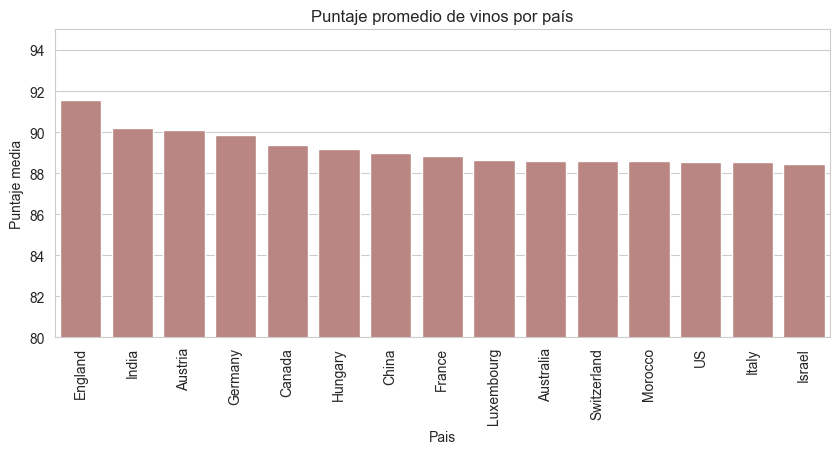

In [17]:
puntaje_pais = df_wines.groupby("country")["points"].mean().reset_index().sort_values(by="points",ascending=False) # Puntaje promedio por pais.

plt.figure(figsize=(10,4))
sns.barplot(data=puntaje_pais.head(15),x="country",y="points",color="xkcd:brownish pink")
plt.title("Puntaje promedio de vinos por país")
plt.ylim(80, 95)
plt.xticks(rotation=90)
plt.xlabel("Pais")
plt.ylabel("Puntaje media")
plt.show()

<h4><em>Resumen de visualizaciones previas de los datos</em></h4>

<ul>
    <li style="font-size:1.4rem; top:2px;">La variable <b>precio</b> posee una frecuencia muy marcada entre los 10 y 100 (USD), por lo que se empleó una escala logarítmica para visualizarla.</li>
    <li style="font-size:1.4rem; top:2px;">De igual manera, la variable <b>precio</b> muestra una cantidad importante de outliers.</li>
    <li style="font-size:1.4rem; top:2px;">Las variables categóricas muestran frecuencias muy bajas despues de los primeros valores mas frecuentes.</li>
    <li style="font-size:1.4rem; top:2px;">Las principales reseñas provienen de aquellos vinos de origen <b>Estadounidense</b>.</li>
    <li style="font-size:1.4rem; top:2px;">Si bien, los puntajes promedios mas altos por pais corresponden a <b>Inglaterra, India y Austria</b>, estos paises no estan entre los primeros 10 con mayor cantidad de reseñas (resultante de un promedio con pocas ponderaciones).</li>
</ul>

><h2>3. Transformación</h2>

<h4><em>3.1. Eliminar columnas fuera de interés.</em></h4>

In [18]:
df_wines.drop(columns="Unnamed: 0",inplace=True,axis=1)

In [19]:
df_wines.drop_duplicates(inplace=True) # Eliminamos duplicados que se generaron al eliminar "Unnamed: 0".

<h4><em>3.2. Imputar valores nulos.</em></h4>

<h4 style="font-size:1.7rem;"><em>3.2.1 Variables numéricas.</em></h4>

In [21]:
nulos_precio = df_wines[["price"]].isna().sum().sum()
print(f"La variable precio contiene {nulos_precio} valores nulos, lo que representa un {(nulos_precio * 100) / df_wines['price'].count():.2f}% sobre el total de datos de la variable.")

La variable precio contiene 8395 valores nulos, lo que representa un 7.52% sobre el total de datos de la variable.


<p style="text-align:center;"><em>Debido a que la cantidad de valores nulos es menor al 10%, y que la correlación entre precio con demas variables es debil, se decide imputar con valor de <b>media o mediana</b> (dependiendo de la distribución de la variable)<p>

In [22]:
df_wines["price"].fillna(value=df_wines["price"].mean(),inplace=True) # Al tener distribución normal, emplearemos media.
df_wines["price"] = df_wines["price"].astype(int)

<h4 style="font-size:1.7rem;"><em>3.2.2 Variables categóricas.</em></h4>

In [23]:
col_cat_nulos = df_wines.loc[:,df_wines.select_dtypes(include="object").columns]

col_cat_nulos.isna().sum().sort_values(ascending=False)

region_2                 73219
designation              34545
taster_twitter_handle    29446
taster_name              24917
region_1                 19560
country                     59
province                    59
variety                      1
description                  0
title                        0
winery                       0
dtype: int64

<p style="text-align:center;"><em>Algunas variables categoricas (como las referidas a posiciones geográficas) estan relacionadas (desde country hasta region_2), por lo cual se imputará por procedencia desconocida.<p>

In [24]:
col_cat_nulos["region_2"].fillna(value="No posee sub-región",inplace=True)
col_cat_nulos["region_1"].fillna(value="Sin dato",inplace=True)
col_cat_nulos["taster_twitter_handle"].fillna(value="Desconocido",inplace=True)
col_cat_nulos["taster_name"].fillna(value="Desconocido",inplace=True)
col_cat_nulos["designation"].fillna(value="Desconocida",inplace=True)
col_cat_nulos["country"].fillna(value="Procedencia desconocida",inplace=True)
col_cat_nulos["province"].fillna(value="Desconocida",inplace=True)

In [25]:
col_cat_nulos.isna().sum() # Verificamos imputacion.

country                  0
description              0
designation              0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  1
winery                   0
dtype: int64

In [26]:
df_wines.loc[:,df_wines.select_dtypes(include="object").columns] = col_cat_nulos # Asignamos valores corregidos al dataframe original.

In [27]:
df_wines = df_wines.dropna(subset=['variety']) # Eliminamos la unica fila con mas del 70% valores nulos.

<h4><em>3.3. Crear o modificar variables de interés.</em></h4>

<h4 style="font-size:1.7rem;"><em>3.3.1 Catalogar precio.</em></h4>

In [28]:
def catalogar_precio(precio_serie:pd.Series) -> pd.Series:
    """
    Cataloga una columna de dataframe (precio) segun el valor del vino (4 categorías, que responden a los cuartiles).
    """

    precio_catalogado = []

    for precio in precio_serie:
        if precio < 18:
            precio_catalogado.append("Accesible")
        elif precio >= 18 and precio < 28:
            precio_catalogado.append("Gama Media")
        elif precio >= 28 and precio < 80:
            precio_catalogado.append("Premium")
        else:
            precio_catalogado.append("de Lujo")

    return precio_catalogado

In [29]:
df_wines["price_categ"] = catalogar_precio(precio_serie=df_wines["price"]) # ELiminar outliers de variable precio empleando categorías.

><h2>4. Carga</h2>

In [31]:
df_wines.to_csv("../1.1_Data_limpia/df_wines_limpio.csv",index=False)